<a href="https://colab.research.google.com/github/ahamedalshafath/task-7/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1 | Data Pre-Processing

Importing the Libraries

In [8]:
import pandas as pd
     

import numpy as np
     

from sklearn.model_selection import train_test_split
     

from sklearn.preprocessing import StandardScaler
     

from sklearn.linear_model import LogisticRegression
     

from sklearn.metrics import confusion_matrix
     

from sklearn.metrics import accuracy_score
     

from sklearn.metrics import plot_roc_curve

Importing the dataset

In [9]:
data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
data.dtypes
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})

In [13]:
data=data.drop("User ID",axis=1)
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Splitting the dataset into the Training set and Test set

In [16]:
x=data[['Gender', 'Age', 'EstimatedSalary']].values
y=data[ 'Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)    

Feature Scaling

In [17]:
scaller=StandardScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
x_test=scaller.transform(x_test)

Step 2 | Logistic Regression Model



Fitting Logistic Regression to the Training set

In [18]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
     

LogisticRegression()

Step 3 | Predection

In [19]:
lgr.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

Step 4 | Evaluating The Predection

Making the Confusion Matrix

In [21]:
confusion=confusion_matrix(y_test,lgr.predict(x_test))
print(confusion)
     

[[46  5]
 [ 8 21]]


In [22]:
acc=accuracy_score(y_test,lgr.predict(x_test))
print(acc)

0.8375


Visualization

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


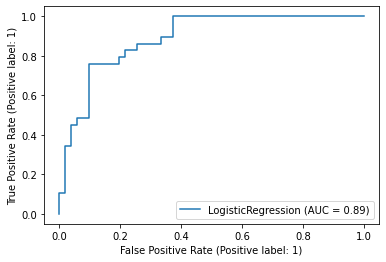

In [23]:
plot_roc_curve(lgr, x_test, y_test)